Ce notebook contient des cellules de texte au format [Markdown](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Working%20With%20Markdown%20Cells.ipynb), et des cellules de code en langage Python. Pour exécuter une cellule de code, cliquez dans la cellule puis tapez `Ctrl-Entrée`. Exécutez les cellules dans l'ordre de lecture du document pour être certain que les importations et déclarations se font correctement.

Les cellules de texte en jaune contiennent des actions à réaliser ou des questions. Donnez vos réponses dans les cellules de texte en rouge ou dans les cellules de code suivant le cas.

# BE1: Introduction à la Programmation Linéaire en Nombres Entiers (PLNE)

La programmation linéaire a été présentée dans le tronc commun de 1A comme un cas particulier d'optimisation sous contraintes (voir les diapos du cours sur LMS). Nous avons vu comment exploiter les propriétés du problème pour réduire l'espace de recherche et présenté l'algorithme du simplexe (Dantzig, 1947). En pratique, cet algorithme est très performant (ses évolutions sont d'ailleurs toujours utilisées dans les solveurs), mais ce n'est que 30 ans après sa découverte qu'on a pu trouver un algorithme polynomial pour résoudre la programmation linéaire: la méthode de l'ellipsoïde (Kachiyan, 1979). La programmation linéaire est donc un problème polynomial. Depuis, d'autres algorithmes polynomiaux ont été élaborés pour résoudre la programmation linéaire, et sont présents dans les solveurs aux côtés de l'algorithme du simplexe.

Lorsqu'on introduit des variables entières dans le problème, on perd les propriétés de continuité de l'ensemble des solutions et on bascule dans les problèmes dits combinatoires. Sauf cas particuliers, ces problèmes sont NP-difficiles et la façon de les modéliser et les résoure prend une grande importance, du fait du nombre de solutions. Le présent BE a pour objectif de présenter la modélisation PLNE et d'illustrer les liens avec la PL, puis de montrer sur deux exemples comment on modélise un problème d'optimisation combinatoire en PLNE.

<div class="alert alert-warning">
Exécutez le code ci-dessous pour importer les bibliothèques nécessaires.
</div>

In [3]:
# Imports: for all the notebook
%matplotlib inline
from lp_visu_notebook import LPVisu
import math
import numpy as np
import numpy.linalg as npla
from scipy.optimize import linprog

!pip install pulp # Ligne à enlever si vous utilisez Anaconda

import pulp

## 1. Un premier exemple

Soit le problème de programmation linéaire en nombre entiers suivant:

\begin{alignat*}{3}
(\mathcal{P}1)\qquad\qquad \max z= 19x_1 &+20x_2 &&\\
\text{sous les contraintes}& &&\\
15x_1 &+17x_2 &&\leq 72 &&\qquad (1)\\
& x_j \in \mathbb{N} \quad && j = 1,2 &&\qquad (2).
\end{alignat*}


<div class="alert alert-warning">
Exécutez le code ci-dessous. La fonction `LPVisu()` permet de tracer l'ensemble $X1$ des solutions admissibles de $(\mathcal{P}1)$. Ce sont les points de coordonnées entières qui vérifient les contraintes (1) et (2) du problème.
</div>

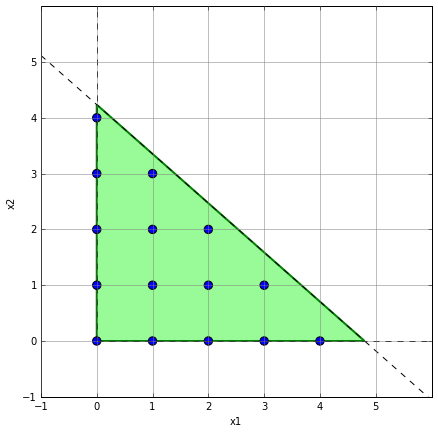

In [3]:
# Définition du problème
A = [[15.0, 17.0]]
b = [72.0]
c = np.array([19.0, 20.0])

# Bornes des variables
x1_bounds     = (0, None)
x2_bounds     = (0, None)

# Zone d'affichage
x1_gui_bounds = (-1, 6)
x2_gui_bounds = (-1, 6)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,integers=True)


Notons $(\mathcal{P}1_R)$ la *relaxation linéaire* de $(\mathcal{P}1)$ où nous transformons les contraintes (2) d'intégrité des variables, $x_j\in \mathbb{N}$, par des contraintes de non négativité $x_j \geq 0$. Le problème $(\mathcal{P}1_R)$ est donc un problème de programmation linéaire.

On dénomme $X1_R$ l'ensemble des solutions admissibles de $(\mathcal{P}1_R)$. C'est le polyèdre vert sur la figure ci-dessus. Il est continu. $X1$, ensemble des solutions admissibles de $(\mathcal{P}1)$, est discret et correspond aux points bleus sur la même figure.

Pour résoudre $(\mathcal{P}1_R)$ qui est un problème de programmation linéaire, nous allons utiliser la fonction `linprog()` de Scipy. Pour plus de détails sur cette fonction, consulter la [documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html).

In [5]:
res = linprog(-c, A_ub=A, b_ub=b, bounds = (x1_bounds, x2_bounds),
              method='simplex')
print(res)

     fun: -91.199999999999989
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.])
  status: 0
 success: True
       x: array([ 4.8,  0. ])


Votre réponse:
   > Sommet optimal $x_R^*$: (4.8,0)
   
   > Optimum $z_R^*$: 91.2

<div class="alert alert-warning">
L'argument `obj` de `LPVisu()` permet de tracer l'ensemble des points $x$ ayant la même valeur de fonction objectif $z_R=c^Tx$. On l'utilise ci-dessous pour visualiser l'optimum. Exécutez le code.
</div>

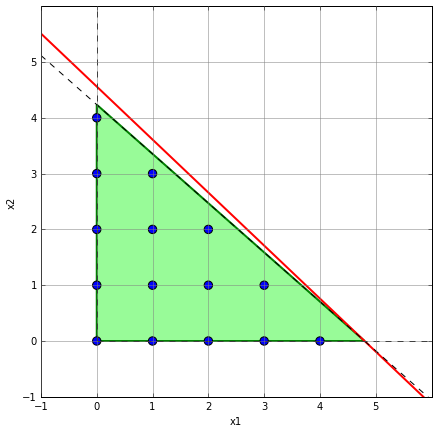

In [6]:
zR=-res.fun

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=zR)

Nous allons maintenant résoudre "manuellement" le problème initial ($\mathcal{P1}$). Pour cela nous cherchons une solution admissible $x \in X1$ qui maximise $19x_1+20x_2$.

<div class="alert alert-warning">
Changer la valeur de `zR` de manière à trouver la meilleure solution admissible de ($\mathcal{P}1$).
<div>

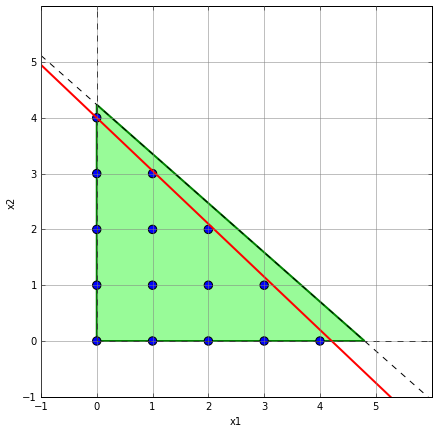

In [5]:
z=80
visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=z)

Votre réponse:
   > Sommet optimal $x^*$: (0,4)
   
   > Optimum $z^*$: 80

Commentaires: l'optimum du problème en nombres entiers n'est pas à proximité du sommet solution de la relaxation linéaire. 


## 2. Formulation idéale

Soit le problème de PLNE suivant:
\begin{alignat*}{3}
(\mathcal{P}2)\qquad\qquad \max z= x_1 &+2x_2 &&\\
\text{sous les contraintes}& &&\\
4&x_1 +\phantom{4}&&x_2 \leq 28 &&\qquad (1)\\
&x_1 +4&&x_2 \leq 27 &&\qquad (2)\\
&x_1 -&&x_2 \leq \phantom{2}2 &&\qquad (3)\\
& x_j \in \mathbb{N}  && \ \ j = 1,2 && \qquad (4).
\end{alignat*}

Notons $(\mathcal{P}2_R)$ la *relaxation linéaire* de $(\mathcal{P}2)$ où nous transformons les contraintes (4) d'intégrité des variables, $x_j\in \mathbb{N}$, par des contraintes de non négativité $x_j \geq 0$. Les ensembles $X2$ et $X2_R$ contiennent les solutions admissibles de $(\mathcal{P}2)$ et $(\mathcal{P}2_R)$, respectivement.
$$X2 \subseteq X2_R$$

Exécuter le code ci-dessous pour résoudre la relaxation linéaire $(\mathcal{P}2_R)$.

     fun: -16.333333333333332
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.        ,  0.        ,  1.66666667])
  status: 0
 success: True
       x: array([ 5.66666667,  5.33333333])


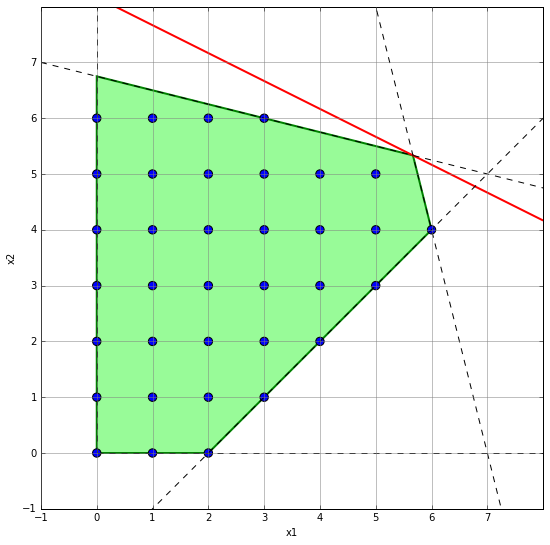

In [5]:
# Définition du problème
A = [[4.0, 1.0], [1.0, 4.0], [1.0, -1.0]]
b = [28.0, 27.0, 2.0]
c = np.array([1.0, 2.0])

# Bornes des variables
x1_bounds     = (0, None)
x2_bounds     = (0, None)

# Zone d'affichage
x1_gui_bounds = (-1, 8)
x2_gui_bounds = (-1, 8)

res = linprog(-c, A_ub=A, b_ub=b, 
              bounds = (x1_bounds, x2_bounds),
              method='simplex')
print(res)

visu = LPVisu(A, b, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=-res.fun)

Votre réponse:
   > Sommet optimal $x^*$: (17/3,16/3)
   
   > Optimum $z^*$: 49/3

Remarquons que la solution optimale de $(\mathcal{P}2_R)$ est située sur un sommet de $X2_R$ pour lequel les variables $x_1$ et $x_2$ ne sont pas entières. Ce n'est donc pas une solution admissible de $(\mathcal{P}2)$.

Afin de résoudre $(\mathcal{P}2)$, nous souhaitons trouver une nouvelle formulation $(\mathcal{P}'2)$ ayant le même ensemble de solutions admissibles $X'2=X2$ et telle que la résolution de sa relaxation linéaire donne une solution optimale entière. Pour cela, considérons l'enveloppe convexe des solutions de $(\mathcal{P}2)$. Comme $X2_R$ est un polyèdre convexe et que les points de $X2$ appartiennent à $X2_R$, on a 
$$X2 \subseteq CONV(X2) \subseteq X2_R$$

De plus, la solution optimale de $(\mathcal{P}2_R)$ n'étant pas entière,
$$CONV(X2) \subset X2_R$$

Ainsi, de manière à résoudre $(\mathcal{P}2)$, nous souhaitons trouver une nouvelle formulation $(\mathcal{P}'2)$ de ce problème telle que 
$$CONV(X2) = X'2_R$$
La résolution de $(\mathcal{P}'2_R)$ donnera une solution entière, et ce quel que soit la fonction objectif, car tous les sommets du polyèdre sont entiers. L'optimum de la relaxation et celle de $(\mathcal{P}2)$ sont confondus. Une telle formulation est appelée *formulation idéale*.


<div class="alert alert-warning">
Proposer une formulation idéale de $(\mathcal{P}2)$ et la résoudre
<div>

Votre réponse
\begin{alignat*}{3}
(\mathcal{P}'2)\qquad\qquad \max z= x_1 &+2x_2 &&\\
\text{under the constraints}& &&\\
& &&x_2 \leq \phantom{1}6  &&\qquad (1)\\
&x_1 +2&&x_2 \leq 15 &&\qquad (2)\\
&x_1 +\phantom{4}&&x_2 \leq 10 &&\qquad (3)\\
&x_1 -&&x_2 \leq \phantom{1}2 &&\qquad (4)\\
& x_j \in \mathbb{N}  && \ \ j = 1,2 && \qquad (5).
\end{alignat*}

     fun: -15.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0.,  1.,  5.])
  status: 0
 success: True
       x: array([ 3.,  6.])


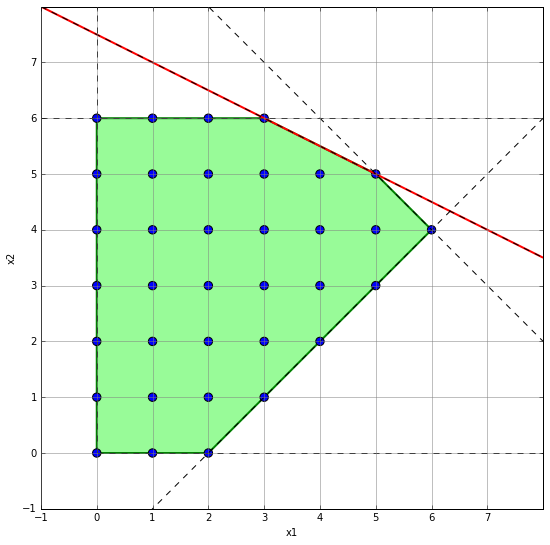

In [6]:
### Votre code

A2 = [[0.0, 1.0], [1.0, 2.0], [1.0, 1.0], [1.0, -1.0]]
b2 = [6.0, 15.0, 10.0, 2.0]

res = linprog(-c, A_ub=A2, b_ub=b2, bounds = (x1_bounds, x2_bounds),
              method='simplex')
print(res)

visu2 = LPVisu(A2, b2, c,
              x1_bounds, x2_bounds,
              x1_gui_bounds, x2_gui_bounds,
              integers=True,
              obj=-res.fun)

Votre réponse:
   > Sommet optimal $x$: (3,6) ou (5,5)
   
   > Optimum $z^*$: 15

Vos commentaires:

# 3. Modélisation en PLNE d'un problème d'optimisation
La bibliothèque open source [PuLP](https://pythonhosted.org/PuLP/index.html) permet de décrire des problèmes d'optimisation en langage Python et les résoudre en faisant appel à des solveurs PL et PLNE. Elle génère des fichiers d'entrée pour différents solveurs comme COIN, GLPK, CPLEX ou GUROBI. Les cellules ci-dessous présentent la façon de modéliser l'exemple de la section 2 avec PuLP.

In [4]:
# problem definition
A = [[4.0, 1.0], [1.0, 4.0], [1.0, -1.0]]
b = [28.0, 27.0, 2.0]
c = [1.0, 2.0]
m,n = np.array(A).shape

### Programmation linéaire

In [5]:
# New problem 
prob = pulp.LpProblem("example", pulp.LpMaximize)

# Decision variables
x = np.empty((n), dtype=object)
for j in range(n):
    x[j] = pulp.LpVariable('x_{}'.format(j))

# Constraints
for i in range(m):
    prob += pulp.lpSum(A[i] * x) <= b[i]

# Objective function
prob += pulp.lpSum(c * x)

# Problem solving
status = prob.solve()
print("Status: ",pulp.LpStatus[status])

# Optimum values
assert pulp.LpStatus[prob.solve()] == 'Optimal'

print("Variables: ", end=' ')
for j in range(n):
    print(pulp.value(x[j]), end=' ')
print()

print("Objective: ",pulp.value(prob.objective))

Status:  Optimal
Variables:  5.6666667 5.3333333 
Objective:  16.3333333


### Programmation linéaire en nombres entiers
Pour passer en nombres entiers, il suffit de changer la catégorie des variables

In [13]:
# New problem 
prob = pulp.LpProblem("example", pulp.LpMaximize)

# Decision variables
x = np.empty((n), dtype=object)
for j in range(n):
    x[j] = pulp.LpVariable('x_{}'.format(j),cat=pulp.LpInteger)

# Constraints
for i in range(m):
    prob += pulp.lpSum(A[i] * x) <= b[i]

# Objective function
prob += pulp.lpSum(c * x)

# Problem solving
status = prob.solve()
print("Status: ",pulp.LpStatus[status])

# Optimum values
assert pulp.LpStatus[prob.solve()] == 'Optimal'

print("Variables: ", end=' ')
for j in range(n):
    print(pulp.value(x[j]), end=' ')
print()

print("Objective: ",pulp.value(prob.objective))

Status:  Optimal
Variables:  5.0 5.0 
Objective:  15.0


## 3.1 Problème d'affectation

Le *problème d'affectation* est un problème classique d'optimisation combinatoire dans lequel on cherche à affecter de manière optimale $n$ candidats à $n$ postes. Pour chaque couple (candidat, poste) on dispose d'une mesure de l'intérêt de cette association. L'objectif est de trouver l'affectation globale des candidats aux postes qui maximise l'intérêt.

In the classical *assignment problem*, we look for an assignment of $n$ candidates on $n$ positions. For each couple (candidate, position) we have a measure of the interest of this association. The goal is to find the global assignment that maximizes the interest. It is a *combinatorial problem*, as there are $n!$ possible assignments of the candidates on the positions.

In order to model this problem, we will use binary variables to represent the assignment of candidate $i$ on position $j$. The constraints must ensure that there is exactly one candidate assigned on each position.

<div class="alert alert-warning">
Combien y a-t-il de solutions à un problème d'affectation à $n$ candidats et $n$ postes ?
<div>

Votre réponse: il y a $n!$ affectations possibles. C'est un problème combinatoire, pas question d'énumérer toutes les solutions pour trouver l'optimum.

#### Modélisation
Nous allons utiliser des variables binaires pour représenter l'affectation du candidat $i$ au poste $j$. Les contraintes doivent garantir qu'il y a un et un seul candidat affecté à chaque poste.

<div class="alert alert-warning">
Modélisez le problème d'affectation avec PuLP et résolvez-le.  
Affichez le résultat: valeur de la fonction objectif et des variables binaires.
<div>

In [15]:
# Matrice d'intérêt de l'affectation d'un candidat à un poste
c=[[ 8,  6,  7,  8,  9],
   [11,  7,  5,  8, 10],
   [ 8, 10,  9, 11,  6],
   [10,  9,  7,  8,  7],
   [11,  6,  9,  7,  8]]

# New problem 
prob = pulp.LpProblem("Assignment", pulp.LpMaximize)

n,n=np.array(c).shape

# Decision variables
x = np.empty((n,n), dtype=object)
for i in range(n):
    for j in range(n):
        x[i,j] = pulp.LpVariable('x_{}_{}'.format(i,j),cat=pulp.LpBinary)

# Constraints
for i in range(n):
    prob += pulp.lpSum(x[i,:]) == 1 
for j in range(n):
    prob += pulp.lpSum(x[:,j]) == 1

# Objective function
prob += pulp.lpSum(c * x)

# Problem solving
status = prob.solve()

# Optimum values
print('Status: ',pulp.LpStatus[status],'\n')

assert pulp.LpStatus[prob.solve()] == 'Optimal'

print("Variables:")
for i in range(n):
    for j in range(n):
        print("%i   " % pulp.value(x[i,j]), end=' ')
    print('\n')

print('Objective: ', pulp.value(prob.objective))

Status:  Optimal 

Variables:
0    0    0    0    1    

1    0    0    0    0    

0    0    0    1    0    

0    1    0    0    0    

0    0    1    0    0    

Objective:  49.0


<div class="alert alert-warning">
Modifiez votre modèle pour résoudre la relaxation linéaire du problème.  
Affichez le résultat et comparez-le au précédent: valeur de la fonction objectif et des variables binaires.
<div>

In [16]:
# New problem 
prob = pulp.LpProblem("Assignment", pulp.LpMaximize)

n,n=np.array(c).shape

# Decision variables
x = np.empty((n,n), dtype=object)
for i in range(n):
    for j in range(n):
        x[i,j] = pulp.LpVariable('x_{}_{}'.format(i,j), cat='Continuous', lowBound=0, upBound=1)

# Constraints
for i in range(n):
    prob += pulp.lpSum(x[i,:]) == 1 
for j in range(n):
    prob += pulp.lpSum(x[:,j]) == 1

# Objective function
prob += pulp.lpSum(c * x)

# Problem solving
status = prob.solve()

# Optimum values
print('Status: ',pulp.LpStatus[status],'\n')

print("Variables:")
assert pulp.LpStatus[prob.solve()] == 'Optimal'

for i in range(n):
    for j in range(n):
        print("  ", pulp.value(x[i,j]), end=' ')
    print('\n')

print('Objective: ', pulp.value(prob.objective))

Status:  Optimal 

Variables:
   0.0    0.0    0.0    0.0    1.0 

   1.0    0.0    0.0    0.0    0.0 

   0.0    0.0    0.0    1.0    0.0 

   0.0    1.0    0.0    0.0    0.0 

   0.0    0.0    1.0    0.0    0.0 

Objective:  49.0


Vos commentaires: la résolution de la relaxation linéaire donne la solution entière. Le problème d'affectation est un cas particulier, la formulation proposée est une formulation idéale. Le problème d'affectation est donc un problème **facile**.

## 3.2 Planification de la production d'électricité

Ce problème, appelé *unit commitment* en anglais, consiste à déterminer à chaque pas de temps la production d'un ensemble de centrales (ou unités) afin de fournir une demande électrique donnée. Il est contraint par les bornes min/max de production des centrales et d'autres contraintes de fonctionnement. L'objectif est de satisfaire la demande avec un coût de production le plus faible possible.

Considérons une société de production d'électricité qui opère deux centrales ayant les caractéristiques suivantes:
<ul>
<li> Centrale 1: puissance fournie située entre 50 et 400 MW, coût de production 20 €/MWH
<li> Centrale 2: puissance fournie située entre 20 et 200 MW, coût de production 40 €/MWH
</ul>

Les deux centrales doivent produire de l'électricité pour satisfaire la demande donnée dans le fichier `demande.txt`. Il représente, heure par heure, la demande d'une semaine.


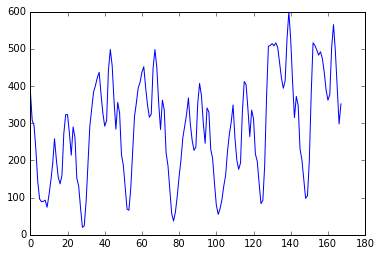

In [3]:
# Données du problème
demande = np.loadtxt("demande.txt")
couts_var = np.array([20, 40])
puissance_max = np.array([400, 200])
puissance_min = np.array([50, 20])

import matplotlib.pyplot as plt
plt.plot(demande)

### Modélisation sur un pas de temps
On s'intéresse à la production d'une centrale 'c' sur un pas de temps 't' donné. Notons 'prod[t,c]' la variable qui désigne cette production. elle doit prendre les valeurs suivantes:
   > 0 si la centrale est arrêtée
   
   > une valeur située dans l'intervale [puissance_min[c], puissance_max[c]] sinon 

<div class="alert alert-warning">
Ecrivez les contraintes linéaires permettant de modéliser ce comportement.  
Si nécessaire, introduisez de nouvelles variables.
<div>

On ajoute la variable binaire `marche[t,c]` qui représente le fait que la centrale c se trouve en marche (1) ou non (0) au temps t.

Les contraintes s'écrivent: $Puissance_{\min}[c].marche[t,c] \leq prod[t,c] \leq Puissance_{\max}[c].marche[t,c] \quad \forall t\in T, c\in C$

### Modélisation des contraintes de fonctionnement
Les centrales ont une contrainte supplémentaire: lorsqu'elles produisent, elles doivent être en fonctionnement au minimum 2 heures d'affilée avant de pouvoir s'arrêter.

<div class="alert alert-warning">
Ecrivez les contraintes linéaires permettant de modéliser ce comportement.  
<div>

On se sert uniquement des variables `marche` pour représenter la relation: $marche[t,c] \rightarrow marche[t-1,c] \vee marche[t+1,c]$

Cette relation s'exprime linéairement : 

$(1-marche[t,c])+marche[t-1,c]+marche[t+1,c]\geq 1$

Soit

$marche[t,c] <= marche[t-1,c] + marche[t+1,c]$

### Modélisation avec PuLP

<div class="alert alert-warning">
Ecrivez le modèle complet avec PuLP et résolvez-le.  
Tracez le graphique de production des centrales à l'optimum.
<div>

Coût total: 1033020 euros


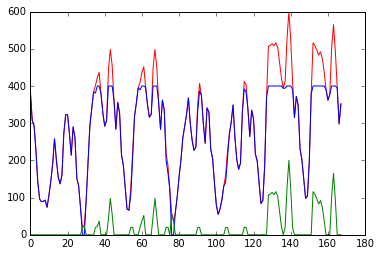

In [19]:
# Résolution avec programmation linéaire en nombres entiers

import pulp    

nbPdt = len(demande)
nbCentrales = len(puissance_max)

prod   = np.empty((nbPdt, nbCentrales), dtype = object)
marche = np.empty((nbPdt, nbCentrales), dtype = object)

for t in range(nbPdt):
    for c in range(nbCentrales):
        prod[t, c] = pulp.LpVariable('prod_t%s_c%s'%(t, c),0, puissance_max[c])
        marche[t, c] = pulp.LpVariable('marche_t%s_c%s'%(t, c), cat = pulp.LpBinary)


#--- Creation du probleme 
pb = pulp.LpProblem('Gestion_production', pulp.LpMinimize)

#--- Fonction objectif
pb += pulp.lpSum(prod * couts_var), 'objectif'

#--- Contraintes: equilibre offre-demande (EOD)
for t in range(nbPdt):
    pb += pulp.lpSum(prod[t,:]) == demande[t], 'EOD_t%s'%t

    #respect des puissances de fonctionnement
    for c in range(nbCentrales):
        pb += prod[t, c] >= marche[t, c] * puissance_min[c], 'pMin_t%s_c%s'%(t,c)
        pb += prod[t, c] <= marche[t, c] * puissance_max[c], 'pMax_t%s_c%s'%(t,c)

# Une centrale reste allumée 2h consécutives p_t,c != 0 => p_t-1,c != 0 or p_t+1,c != 0
# [arret = 0, marche = 1, arret = 0] est la seule configuration interdite
for c in range(nbCentrales):
       for t in range(1, nbPdt - 1):
              pb += marche[t, c] <= marche[t-1, c] + marche[t+1, c]

#--- Resolution
assert pulp.LpStatus[pb.solve()] == 'Optimal'

#--- Ecriture des sorties
for t in range(nbPdt):
    for c in range(nbCentrales): 
        prod[t,c] = prod[t,c].value()

couts = np.sum(prod * np.array(couts_var))

print('Coût total: %d euros' % couts)

plt.plot (demande, 'r')
plt.plot(prod)


On remarque que la centrale n°1 (courbe bleue) est utilisée en priorité pour couvrir la demande (en rouge). En effet elle coûte moins cher que la centrale n°2 (en vert) qui n'est utilisée que lorsque la centrale n°1 ne peut pas satisfaire toute la demande.